# Symbolic Aggregate approXimation *(SAX)* Encoding

In [3]:
#Uncomment the following line to install the pynuTS package

#!pip install git+https://github.com/nickprock/pynuTS.git@main

In [4]:
# allow import from parent directory 
# (this is useful if running the demo from inside the pynuTS package tree)

import sys,os
sys.path.append(os.getcwd() + '/..')

In [5]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [7]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [8]:
time = np.arange(12)

np.random.seed(42)
a = 0.5
b = 10
c = 20

list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a, b, c) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [9]:
X = pd.DataFrame(list_series).T

In [10]:
X

,0,1,2,3,4,5,6,7,8,9
0,2.205474,0.101611,-0.964265,0.997022,-0.677764,0.685582,-1.382808,1.519191,0.453472,-0.843997
1,0.069449,0.457708,0.473073,1.470088,-0.129775,-0.953539,0.078412,-1.192784,-0.046796,-0.725806
2,-0.731779,0.849814,1.124338,1.201114,0.118647,0.853102,1.420442,0.783381,-0.508449,-0.910582
3,0.657795,-1.054710,-0.720269,0.060094,-0.075952,-0.283590,-0.458181,0.693493,-0.765945,1.849135
4,0.010482,-0.672720,3.195725,1.047313,1.897207,-0.421568,2.016602,-0.346937,0.860393,1.268413
5,0.653513,0.828911,1.881854,1.896071,1.013692,1.241450,1.479147,3.380622,-0.538821,1.901841
6,0.128268,3.307636,2.519571,2.743360,1.694597,4.178644,2.820452,2.463656,3.120786,2.100604
7,3.725386,1.202565,4.428747,4.234054,3.413073,4.301919,3.499707,4.413371,5.048322,4.154627
8,8.212429,3.212035,4.472161,4.460823,3.495818,4.462692,6.211650,6.770894,5.466479,5.229801
9,6.208502,6.341304,10.060470,7.357266,6.670411,6.773723,8.797394,7.459220,8.644321,7.033739


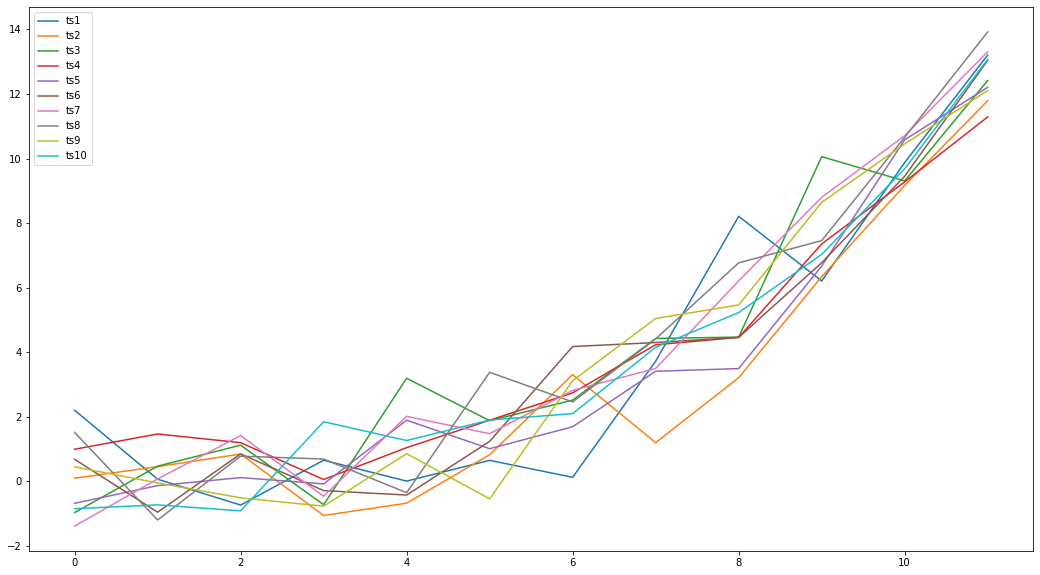

In [11]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Anomaly detection with SAX Encoding

We choose a window size 4. We reduct the 12 periods in 3 periods, like quarters in a year.

In [12]:
sax = NaiveSAX(windows=4)

In [13]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** is a sequence of labels, like 'AAA' in this case.

In [14]:
sax_strings

array(['CBA', 'CAB', 'BCA', 'ABC', 'BAC', 'BCA', 'ACB', 'ABC', 'ABC',
       'BAC', 'ACB', 'ACB'], dtype='<U3')

We create a new column and we count the occorrence

In [15]:
X["sax_strings"]=sax_strings

In [16]:
count = X.sax_strings.value_counts().reset_index()

Now we define when a time series is an anomaly. In this example an anomaly is a time series with frequency 1.

In [17]:
anomaly_limit=1
X["anomaly"] = False
X.loc[X['sax_strings'].isin(count.loc[count['sax_strings']==anomaly_limit, 'index']),'anomaly']=True

### Plot the series

In blu the standard patterns

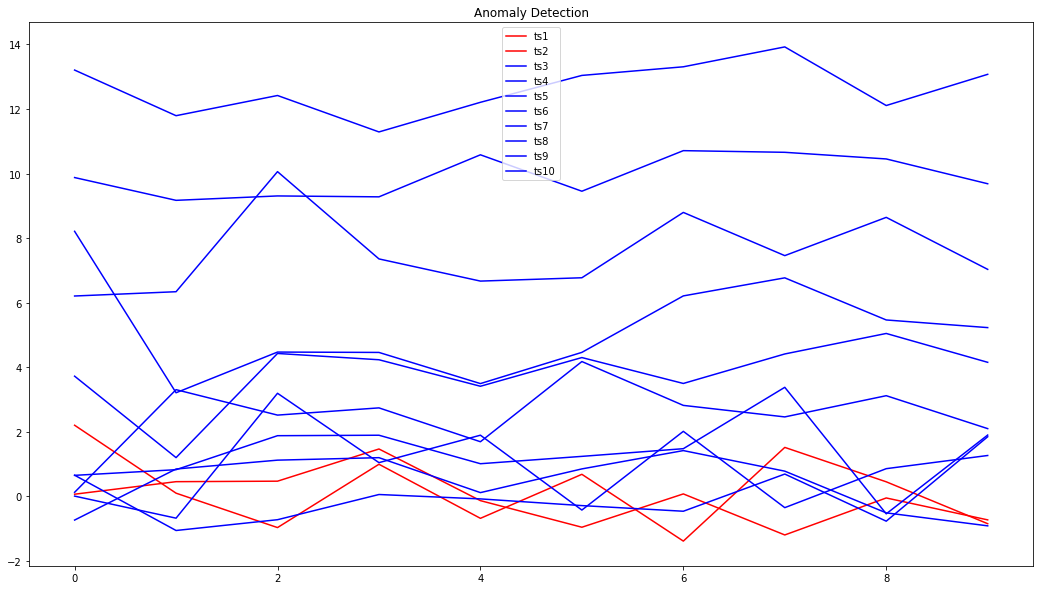

In [18]:
plt.figure(figsize=(18,10))
for i in range(X.shape[0]):
    if X.iloc[i,-1]:
        col = 'r'
    else:
        col = 'b'
    plt.plot(X.iloc[i,:-2], col)
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.title("Anomaly Detection")
plt.show()

## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
